<h3> Importation des Librairies

In [1]:
!pip install pmdarima

You should consider upgrading via the 'c:\users\lena\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import shapiro
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error
import pmdarima.arima as pm

<h3> Importation des données

In [3]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%209/eCO2mix_RTE_energie_M.csv'
df_energie=pd.read_csv(filepath, 
                      sep=',',
                      encoding='latin3')

In [4]:
df_energie

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2019-03,Données définitives,Occitanie,2728,1125.0,58,NaN,1,56,829,...,72,3336,-736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,2019-03,Données définitives,Normandie,5984,5358.0,323,-5.0,41,286,12,...,41,2598,3385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,2019-03,Données définitives,Hauts-de-France,5358,3236.0,769,2.0,7,759,1,...,94,4663,695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,2019-03,Données définitives,PACA,1413,NaN,467,-2.0,13,456,663,...,81,3475,-2070.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%209/dju_chauffage.csv'
df_chauffage=pd.read_csv(filepath)

In [6]:
df_chauffage

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,TOTAL
0,2010,624.8,474.7,414.9,292.7,260.6,112.6,46.5,93.8,163.6,286.4,419.3,644.1,3833.8
1,2011,507.2,408.6,368.7,202.0,165.6,117.2,122.5,84.7,101.9,232.3,338.0,424.8,3073.4
2,2012,454.5,555.6,334.9,344.4,192.8,133.3,95.3,59.6,165.5,262.1,403.3,455.7,3456.9
3,2013,548.2,519.7,505.5,326.3,277.4,146.0,51.3,79.0,141.8,209.3,417.7,456.5,3678.6
4,2014,434.4,376.9,346.9,255.1,219.7,124.4,76.3,104.9,111.9,194.5,326.6,489.2,3060.6
5,2015,507.0,472.3,400.2,269.9,210.1,109.2,62.7,61.0,184.6,293.5,301.0,349.1,3220.5
6,2016,477.6,428.8,445.1,333.6,207.6,117.4,66.3,61.3,85.7,290.2,400.3,511.6,3425.4
7,2017,592.6,382.6,318.9,315.3,168.7,72.8,59.2,74.7,158.1,206.1,392.9,483.4,3225.2
8,2018,417.9,537.6,426.6,224.3,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%209/dju_clim.csv'
df_clim=pd.read_csv(filepath)

In [8]:
df_clim

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,TOTAL
0,2010,0,0,0.0,2.6,7.6,27.5,61.1,24.4,4.4,1.9,0,0,129.4
1,2011,0,0,0.1,7.8,10.8,27.7,11.7,28.8,26.8,6.3,0,0,120.0
2,2012,0,0,0.5,0.1,12.2,9.7,24.3,53.2,10.1,1.1,0,0,111.2
3,2013,0,0,0.0,2.9,0.0,12.4,68.7,40.9,12.1,0.8,0,0,137.9
4,2014,0,0,0.0,0.3,1.4,13.2,43.1,10.5,15.3,3.1,0,0,86.9
5,2015,0,0,0.0,2.7,1.9,33.5,71.3,64.9,0.9,0.0,0,0,175.3
6,2016,0,0,0.0,0.0,4.0,12.4,44.9,63.5,30.9,0.1,0,0,155.7
7,2017,0,0,0.3,0.7,22.3,51.9,51.6,36.1,2.5,2.5,0,0,167.9
8,2018,0,0,0.0,9.3,17.9,0.0,0.0,0.0,0.0,0.0,0,0,27.2


<h2> <center> Nettoyage des données

<h3> Sélection des colonnes importantes

In [9]:
conso=df_energie[['Mois','Qualité','Territoire','Consommation totale']].rename(columns={'Qualité':'qualite','Territoire':'territoire','Consommation totale':'consommation'})

In [10]:
conso

,Mois,qualite,territoire,consommation
0,0000-00,Données consolidées,Grand-Est,3364
1,0000-00,Données définitives,Nouvelle-Aquitaine,3222
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,5010
3,0000-00,Données définitives,Bourgogne-Franche-Comté,1533
4,0000-00,Données définitives,Bretagne,1493
...,...,...,...,...
1019,2019-03,Données définitives,Occitanie,3336
1020,2019-03,Données définitives,Normandie,2598
1021,2019-03,Données définitives,Hauts-de-France,4663
1022,2019-03,Données définitives,PACA,3475


<h3> Suppression des mois 0000

In [11]:
conso=conso[conso.Mois!="0000-00"]

<h3> Transformation en Datetime

In [12]:
conso["Mois"]=pd.to_datetime(conso["Mois"])

<ipython-input-12-9b461e9b4524>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso["Mois"]=pd.to_datetime(conso["Mois"])


<h3> Sélection du Territoire Français

In [13]:
conso=conso[conso.territoire=="France"]

In [14]:
conso

,Mois,qualite,territoire,consommation
13,2010-01-01,Données consolidées,France,56342
14,2010-02-01,Données consolidées,France,48698
15,2010-03-01,Données consolidées,France,48294
16,2010-04-01,Données consolidées,France,38637
17,2010-05-01,Données consolidées,France,37284
...,...,...,...,...
965,2018-11-01,Données définitives,France,43814
978,2018-12-01,Données définitives,France,47562
991,2019-01-01,Données définitives,France,53563
1004,2019-02-01,Données définitives,France,44225


<h3> Supression des dates non en commun avec DJU

In [15]:
conso=conso[conso.Mois<"2018-06-01"]

<h3> Selection des colonnes importantes

In [16]:
conso=conso.drop(columns=["qualite","territoire"])

In [17]:
conso=conso.reset_index(drop=True)

In [18]:
conso

,Mois,consommation
0,2010-01-01,56342
1,2010-02-01,48698
2,2010-03-01,48294
3,2010-04-01,38637
4,2010-05-01,37284
...,...,...
96,2018-01-01,48807
97,2018-02-01,50236
98,2018-03-01,48484
99,2018-04-01,36236


<h3> Représention graphique de la consommation de la france entre 2010 et 2018

Text(0.5, 0, 'Année')

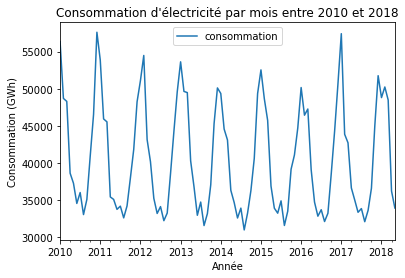

In [19]:
conso.plot(y="consommation",x='Mois')
plt.title("Consommation d'électricité par mois entre 2010 et 2018")
plt.ylabel('Consommation (GWh)')
plt.xlabel('Année')

<h3> Addition des valeurs de dju chauffage et clim 

In [20]:
dju_total=df_chauffage + df_clim
dju_total

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,TOTAL
0,4020,624.8,474.7,414.9,295.3,268.2,140.1,107.6,118.2,168.0,288.3,419.3,644.1,3963.2
1,4022,507.2,408.6,368.8,209.8,176.4,144.9,134.2,113.5,128.7,238.6,338.0,424.8,3193.4
2,4024,454.5,555.6,335.4,344.5,205.0,143.0,119.6,112.8,175.6,263.2,403.3,455.7,3568.1
3,4026,548.2,519.7,505.5,329.2,277.4,158.4,120.0,119.9,153.9,210.1,417.7,456.5,3816.5
4,4028,434.4,376.9,346.9,255.4,221.1,137.6,119.4,115.4,127.2,197.6,326.6,489.2,3147.5
5,4030,507.0,472.3,400.2,272.6,212.0,142.7,134.0,125.9,185.5,293.5,301.0,349.1,3395.8
6,4032,477.6,428.8,445.1,333.6,211.6,129.8,111.2,124.8,116.6,290.3,400.3,511.6,3581.1
7,4034,592.6,382.6,319.2,316.0,191.0,124.7,110.8,110.8,160.6,208.6,392.9,483.4,3393.1
8,4036,417.9,537.6,426.6,233.6,180.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<h3> Transformation des mois

In [21]:
dju_total['Unnamed: 0']=dju_total['Unnamed: 0']/2

In [22]:
dju_total=dju_total.rename(columns={'Unnamed: 0':'Annee',"JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"}).drop(columns='TOTAL')

In [23]:
dju_total['Annee']=dju_total['Annee'].astype(int)

In [24]:
dju_total.dtypes

Annee      int32
01       float64
02       float64
03       float64
04       float64
05       float64
06       float64
07       float64
08       float64
09       float64
10       float64
11       float64
12       float64
dtype: object

In [25]:
dju_total

,Annee,01,02,03,04,05,06,07,08,09,10,11,12
0,2010,624.8,474.7,414.9,295.3,268.2,140.1,107.6,118.2,168.0,288.3,419.3,644.1
1,2011,507.2,408.6,368.8,209.8,176.4,144.9,134.2,113.5,128.7,238.6,338.0,424.8
2,2012,454.5,555.6,335.4,344.5,205.0,143.0,119.6,112.8,175.6,263.2,403.3,455.7
3,2013,548.2,519.7,505.5,329.2,277.4,158.4,120.0,119.9,153.9,210.1,417.7,456.5
4,2014,434.4,376.9,346.9,255.4,221.1,137.6,119.4,115.4,127.2,197.6,326.6,489.2
5,2015,507.0,472.3,400.2,272.6,212.0,142.7,134.0,125.9,185.5,293.5,301.0,349.1
6,2016,477.6,428.8,445.1,333.6,211.6,129.8,111.2,124.8,116.6,290.3,400.3,511.6
7,2017,592.6,382.6,319.2,316.0,191.0,124.7,110.8,110.8,160.6,208.6,392.9,483.4
8,2018,417.9,537.6,426.6,233.6,180.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
dju_total=dju_total.set_index('Annee')

<h3> Transformation en datetime Année-mois-jour

In [27]:
dju_final={'Mois':[],'dju':[]}

In [28]:
for Annee in dju_total.index.values:
    for Mois in dju_total.columns:
        dju_final['Mois'].append(f"{Annee}-{Mois}-01")
        dju_final['dju'].append(dju_total.loc[Annee,Mois])

In [29]:
dju_final=pd.DataFrame(dju_final)

In [30]:
dju_final

,Mois,dju
0,2010-01-01,624.8
1,2010-02-01,474.7
2,2010-03-01,414.9
3,2010-04-01,295.3
4,2010-05-01,268.2
...,...,...
103,2018-08-01,0.0
104,2018-09-01,0.0
105,2018-10-01,0.0
106,2018-11-01,0.0


In [31]:
dju_final['Mois']=pd.to_datetime(dju_final['Mois'])

In [32]:
dju_final

,Mois,dju
0,2010-01-01,624.8
1,2010-02-01,474.7
2,2010-03-01,414.9
3,2010-04-01,295.3
4,2010-05-01,268.2
...,...,...
103,2018-08-01,0.0
104,2018-09-01,0.0
105,2018-10-01,0.0
106,2018-11-01,0.0


<h3> Sélection des dju correspondant a la dataframe consommation 

In [33]:
dju_final=dju_final[dju_final.Mois<"2018-06-01"]

<h3> Représentation des dju par mois

Text(0.5, 0, 'Année')

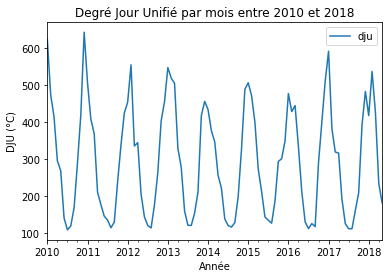

In [34]:
dju_final.plot(y="dju",x='Mois')
plt.title("Degré Jour Unifié par mois entre 2010 et 2018")
plt.ylabel('DJU (°C)')
plt.xlabel('Année')

<h3> Merge des dataframes conso et dju

In [35]:
df_conso_france=conso.merge(dju_final,on='Mois', how='left')

In [36]:
df_conso_france=df_conso_france.set_index('Mois')
df_conso_france

,consommation,dju
Mois,,
2010-01-01,56342,624.8
2010-02-01,48698,474.7
2010-03-01,48294,414.9
2010-04-01,38637,295.3
2010-05-01,37284,268.2
...,...,...
2018-01-01,48807,417.9
2018-02-01,50236,537.6
2018-03-01,48484,426.6


<h3> Représentation de la consommation et du dju

Text(0.5, 0, 'Année')

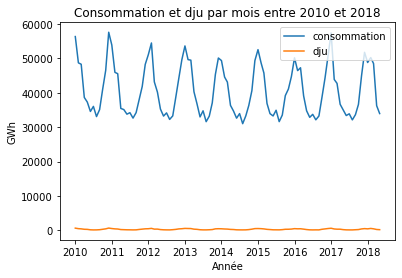

In [37]:
plt.plot(df_conso_france)
plt.legend(['consommation','dju'])
plt.title("Consommation et dju par mois entre 2010 et 2018")
plt.ylabel('GWh')
plt.xlabel('Année')

<h3> Représentation de la consommation et du dju en logarithme

In [38]:
df_conso_log=df_conso_france.copy()

In [39]:
df_conso_log['consommation']=np.log(df_conso_log["consommation"])
df_conso_log['dju']=np.log(df_conso_log["dju"])
df_conso_log

,consommation,dju
Mois,,
2010-01-01,10.939196,6.437432
2010-02-01,10.793393,6.162683
2010-03-01,10.785063,6.028038
2010-04-01,10.561966,5.687992
2010-05-01,10.526320,5.591733
...,...,...
2018-01-01,10.795629,6.035242
2018-02-01,10.824487,6.287115
2018-03-01,10.788989,6.055847


Text(0.5, 0, 'Année')

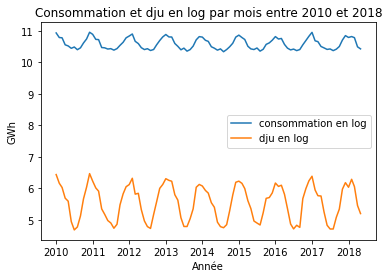

In [40]:
plt.plot(df_conso_log)
plt.legend(['consommation en log','dju en log'])
plt.title("Consommation et dju en log par mois entre 2010 et 2018")
plt.ylabel('GWh')
plt.xlabel('Année')

<center> <h1> Question 1

<h2> <center> Régression linéaire

In [41]:
y = df_conso_france['consommation']
X = df_conso_france['dju']
X = sm.add_constant(X)

In [42]:
results=sm.OLS(y,X).fit()
results.params

const    26380.188272
dju         48.095778
dtype: float64

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           consommation   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1983.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.69e-67
Time:                        15:46:07   Log-Likelihood:                -887.64
No. Observations:                 101   AIC:                             1779.
Df Residuals:                      99   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.638e+04    356.879     73.919      0.0

La variance explicative est de 95%, il y a une significativité pour toutes les variables et il n'y a pas de multicolinéarité entre les variables

No handles with labels found to put in legend.


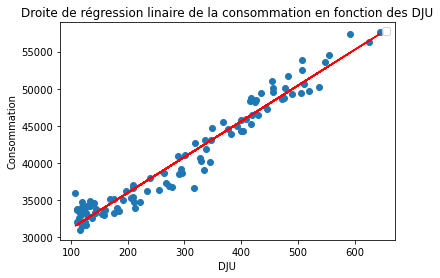

In [44]:
plt.scatter(df_conso_france['dju'],y)
plt.plot(df_conso_france['dju'],results.predict(),color="red")
plt.xlabel("DJU")
plt.ylabel("Consommation")
plt.legend()
plt.title("Droite de régression linaire de la consommation en fonction des DJU")
plt.show()

<h3> Test normalité des résidus

*Test de normalité*

In [45]:
res_reg=results.resid

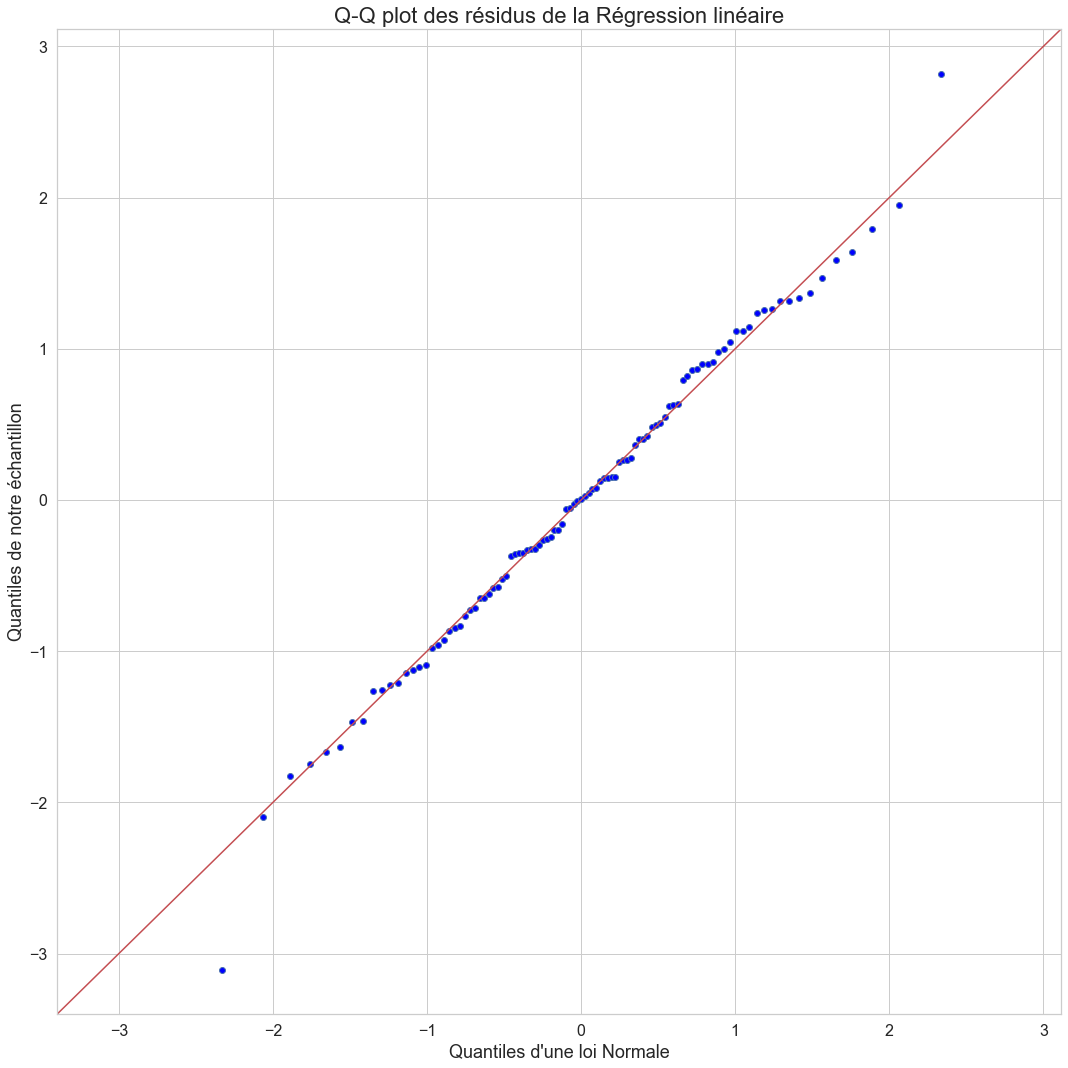

In [46]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,15))

sm.qqplot(res_reg, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus de la Régression linéaire', fontsize=22)
plt.tight_layout()
plt.show()

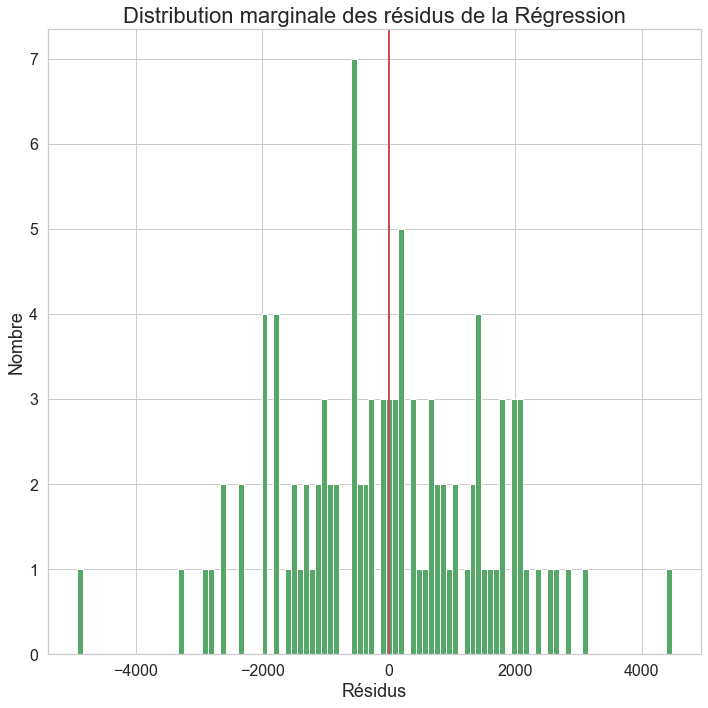

In [47]:
X_ln2=res_reg
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus de la Régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [48]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_reg)
lzip(name, test)

[('Jarque-Bera', 0.26639609949856724),
 ('Chi^2 two-tail prob.', 0.8752917236351304),
 ('Skew', -0.10300593408662698),
 ('Kurtosis', 3.144433907435096)]

In [49]:
shapiro(res_reg)

ShapiroResult(statistic=0.9947089552879333, pvalue=0.9656004905700684)

Les résidus suivent une loi normale.

*Test de linéarité*

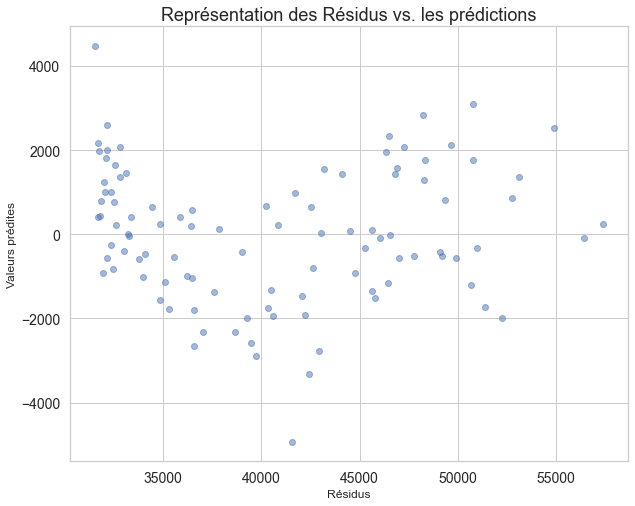

In [50]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, res_reg, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

In [51]:
sms.het_goldfeldquandt(results.resid, results.model.exog)

(1.0725724203405251, 0.4037383268414981, 'increasing')

La P-value est supérieure au seuil de 5%. L'Homostédasticité est donc acceptée.

*Test de corrélation des résidus

In [52]:
sms.durbin_watson(results.resid)

1.6908651371693741

The null hypothesis of the test is that there is no serial correlation in the residuals.

Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

<h2> <center> Correction de la consommation de l'efffet température

<h3> Récupération des données prédites (exogène)

In [53]:
df_conso_france['conso_corrige']=results.predict(results.model.exog)

In [54]:
df_conso_france

,consommation,dju,conso_corrige
Mois,,,
2010-01-01,56342,624.8,56430.430531
2010-02-01,48698,474.7,49211.254213
2010-03-01,48294,414.9,46335.126673
2010-04-01,38637,295.3,40582.871593
2010-05-01,37284,268.2,39279.476002
...,...,...,...
2018-01-01,48807,417.9,46479.414008
2018-02-01,50236,537.6,52236.478666
2018-03-01,48484,426.6,46897.847279


<h3> Représentation de la consommation et de la consommation corrigée

Text(0.5, 0, 'Année')

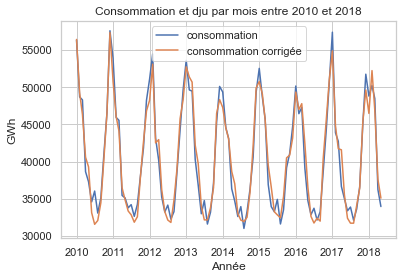

In [55]:
plt.plot(df_conso_france[['consommation','conso_corrige']])
plt.legend(['consommation','consommation corrigée'])
plt.title("Consommation et dju par mois entre 2010 et 2018")
plt.ylabel('GWh')
plt.xlabel('Année')

<h3> Test d'adfuller pour la détermination de la stationnarité de la consommation corrigée

In [56]:
adfuller(df_conso_france['conso_corrige'])[1]

0.10180246109468177

adfuller : H0 la serie n'est pas stationnaire

<h1> <center> Question 2 

<h2> <center> Désaisonnalisation de la consommasion corrigé grâce aux moyennes mobiles

In [57]:
conso_corig=df_conso_france.copy()
conso_corig=conso_corig.drop(columns=['consommation','dju'])
conso_corig

,conso_corrige
Mois,
2010-01-01,56430.430531
2010-02-01,49211.254213
2010-03-01,46335.126673
2010-04-01,40582.871593
2010-05-01,39279.476002
...,...
2018-01-01,46479.414008
2018-02-01,52236.478666
2018-03-01,46897.847279


<h3> Détermination des moyenne mobiles

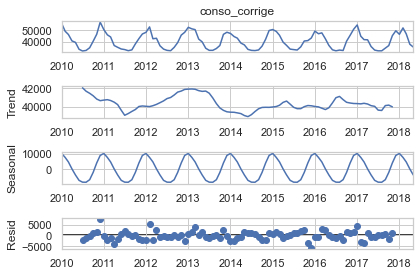

In [58]:
decomp_x = seasonal_decompose(conso_corig.conso_corrige,  model='additive')
decomp_x.plot()
plt.show()

In [59]:
conso_corig['MM']=conso_corig.conso_corrige.rolling(window=12).mean()

In [60]:
conso_corig

,conso_corrige,MM
Mois,,
2010-01-01,56430.430531,NaN
2010-02-01,49211.254213,NaN
2010-03-01,46335.126673,NaN
2010-04-01,40582.871593,NaN
2010-05-01,39279.476002,NaN
...,...,...
2018-01-01,46479.414008,39279.876800
2018-02-01,52236.478666,39901.113936
2018-03-01,46897.847279,40331.571151


<h3> Représentation de la consommation corrigé et de la moyenne mobile

Text(0.5, 0, 'Année')

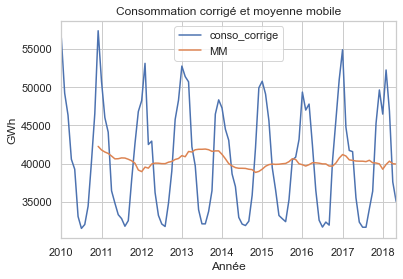

In [61]:
conso_corig.plot()
plt.title("Consommation corrigé et moyenne mobile")
plt.ylabel('GWh')
plt.xlabel('Année')

<h3> De-stationnarisé avec différenciation moyenne mobile 12 périodes

In [62]:
conso_corig['conso_corrig_diff']=conso_corig['conso_corrige']-conso_corig['MM']

In [63]:
conso_corig

,conso_corrige,MM,conso_corrig_diff
Mois,,,
2010-01-01,56430.430531,NaN,NaN
2010-02-01,49211.254213,NaN,NaN
2010-03-01,46335.126673,NaN,NaN
2010-04-01,40582.871593,NaN,NaN
2010-05-01,39279.476002,NaN,NaN
...,...,...,...
2018-01-01,46479.414008,39279.876800,7199.537208
2018-02-01,52236.478666,39901.113936,12335.364730
2018-03-01,46897.847279,40331.571151,6566.276127


<h3> Représentation graphique de la consommation corrigé et de la consommation corrigé différenciée avec les moyennes mobiles

Text(0.5, 0, 'Année')

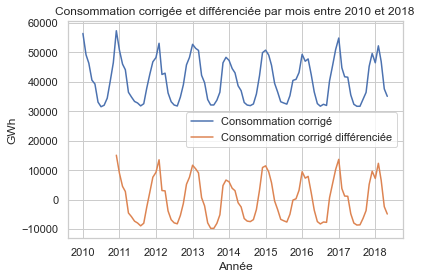

In [64]:
plt.plot(conso_corig[['conso_corrige','conso_corrig_diff']])
plt.legend(['Consommation corrigé','Consommation corrigé différenciée'])
plt.title("Consommation corrigée et différenciée par mois entre 2010 et 2018")
plt.ylabel('GWh')
plt.xlabel('Année')

<h3> Test d'adfuller pour la détermination de la stationnarité de la consommation corrigée différenciée avec les moyennes mobiles

In [65]:
adfuller(conso_corig['conso_corrig_diff'].dropna())[1]

1.1889371380195312e-09

La série est stationnaire

In [66]:
consommation_corrigé=conso_corig.copy()

In [67]:
consommation_corrigé=consommation_corrigé.drop(columns=['MM','conso_corrig_diff'])

<center> <h1> Question 3

<h2> <center> Lissage exponentiel 

In [68]:
test_conso=consommation_corrigé[84:]

In [69]:
test_conso

,conso_corrige
Mois,
2017-01-01,54881.746471
2017-02-01,44781.633035
2017-03-01,41732.360693
2017-04-01,41578.454203
2017-05-01,35566.481920
2017-06-01,32377.731821
2017-07-01,31709.200503
2017-08-01,31709.200503
2017-09-01,34104.370261


In [70]:
y_hat_avg = test_conso.copy()

In [71]:
train_conso = consommation_corrigé[:84]

In [72]:
train_conso

,conso_corrige
Mois,
2010-01-01,56430.430531
2010-02-01,49211.254213
2010-03-01,46335.126673
2010-04-01,40582.871593
2010-05-01,39279.476002
...,...
2016-08-01,32382.541399
2016-09-01,31988.156017
2016-10-01,40342.392701


<h3> Triple HWES Holt-Winters : additives

In [73]:
fitted_model = ExponentialSmoothing(np.asarray(train_conso) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [74]:
y_hat_avg['Holt_Winter'] = fitted_model.forecast(len(test_conso))

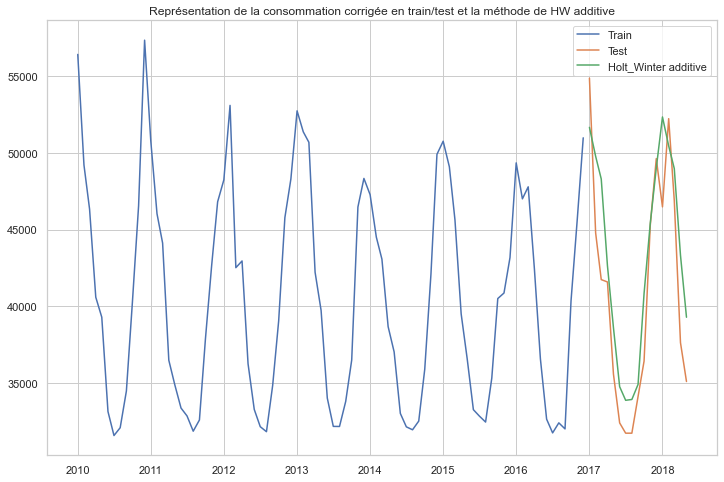

In [75]:
plt.figure(figsize=(12,8))
plt.plot(train_conso, label='Train')
plt.plot(test_conso, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter additive')
plt.title("Représentation de la consommation corrigée en train/test et la méthode de HW additive")
plt.legend(loc='best')
plt.show()

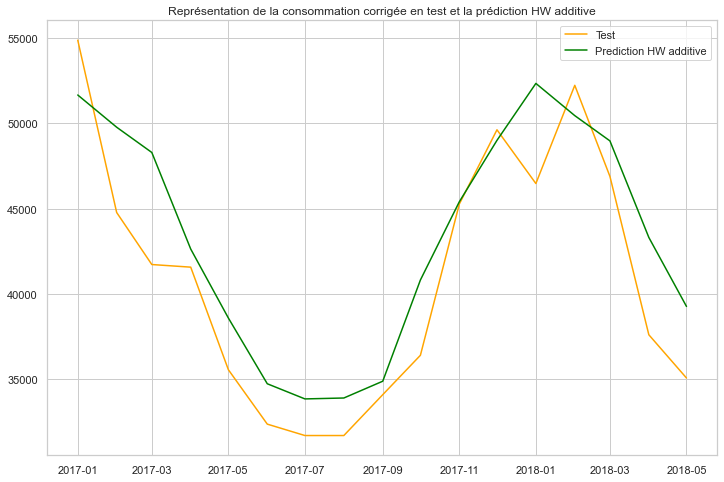

In [76]:
plt.figure(figsize=(12,8))
plt.plot(test_conso, label='Test',color="orange")
plt.title("Représentation de la consommation corrigée en test et la prédiction HW additive")
plt.plot(y_hat_avg['Holt_Winter'], label='Prediction HW additive',color="green")
plt.legend(loc='best')
plt.show()

La prédiction correspond au test. 

**Evaluation Metrics :**
Let’s see how the model has fared in terms of error term calculations. We would be using MAE(Mean Absolute Error) and MSE(Mean Squared Error) as metrics.

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
f_Mean_Absolute_Error = mean_absolute_error(test_conso,y_hat_avg.Holt_Winter)
f_Mean_Absolute_Error

3009.6395640702835

In [78]:
f_Mean_Squared_Error = mean_squared_error(test_conso,y_hat_avg.Holt_Winter)
f_Mean_Squared_Error

12727394.4743634

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_conso,y_hat_avg.Holt_Winter)

0.07553216063365195

<h3> Triple HWES Holt_Winters : multiplicatives

In [80]:
fitted_model = ExponentialSmoothing(np.asarray(train_conso) ,seasonal_periods=12 ,trend='mul', seasonal='mul').fit()

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [81]:
y_hat_avg['Holt_Winter_mul'] = fitted_model.forecast(len(test_conso))

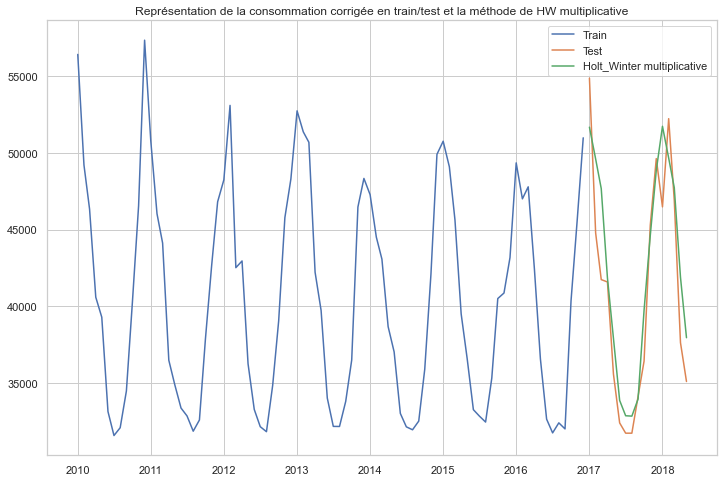

In [82]:
plt.figure(figsize=(12,8))
plt.plot(train_conso, label='Train')
plt.plot(test_conso, label='Test')
plt.plot(y_hat_avg['Holt_Winter_mul'], label='Holt_Winter multiplicative')
plt.title("Représentation de la consommation corrigée en train/test et la méthode de HW multiplicative")
plt.legend(loc='best')
plt.show()

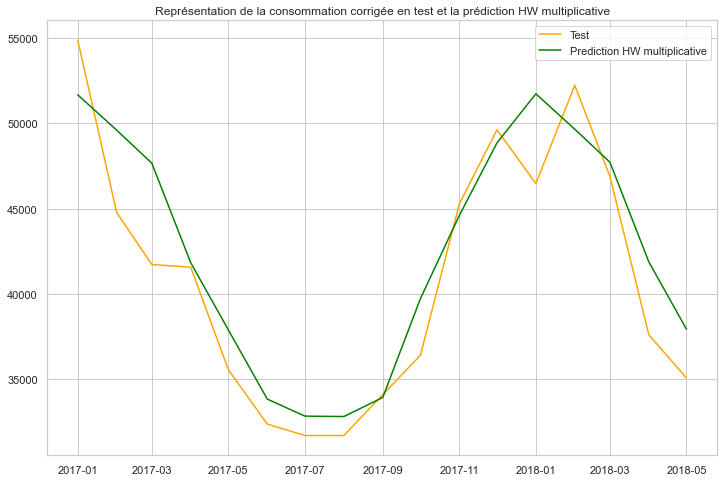

In [83]:
plt.figure(figsize=(12,8))
plt.plot(test_conso, label='Test',color="orange")
plt.title("Représentation de la consommation corrigée en test et la prédiction HW multiplicative")
plt.plot(y_hat_avg['Holt_Winter_mul'], label='Prediction HW multiplicative',color="green")
plt.legend(loc='best')
plt.show()

La prédiction correspond au test. 

In [84]:
f_Mean_Absolute_Error = mean_absolute_error(test_conso,y_hat_avg.Holt_Winter_mul)
f_Mean_Absolute_Error

2411.2601647468923

In [85]:
f_Mean_Squared_Error = mean_squared_error(test_conso,y_hat_avg.Holt_Winter_mul)
f_Mean_Squared_Error

8969770.280701943

In [86]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_conso,y_hat_avg.Holt_Winter_mul)

0.05870328957457801

<h3> Double Holt : multiplicatives

In [87]:
fitted_model = ExponentialSmoothing(np.asarray(train_conso) ,trend='mul').fit()

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [88]:
y_hat_avg['Holt_Winter_double'] = fitted_model.forecast(len(test_conso))

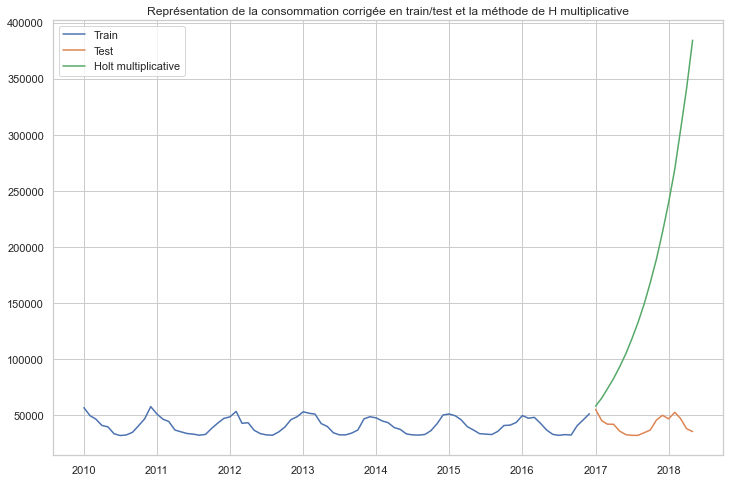

In [89]:
plt.figure(figsize=(12,8))
plt.plot(train_conso, label='Train')
plt.plot(test_conso, label='Test')
plt.plot(y_hat_avg['Holt_Winter_double'], label='Holt multiplicative')
plt.title("Représentation de la consommation corrigée en train/test et la méthode de H multiplicative")
plt.legend(loc='best')
plt.show()

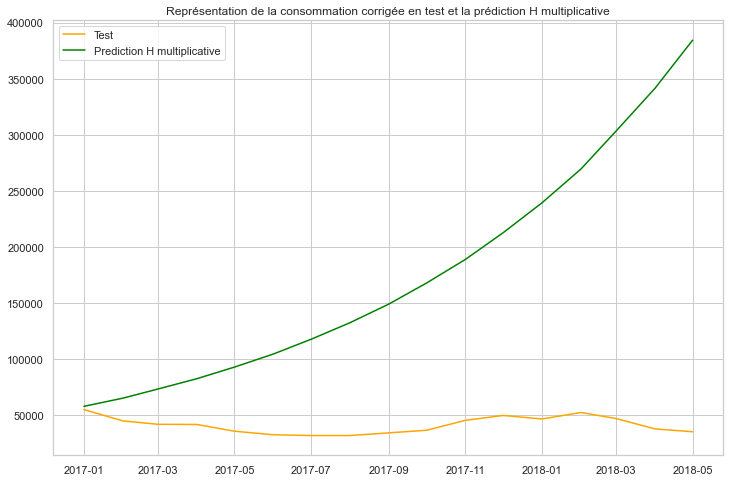

In [90]:
plt.figure(figsize=(12,8))
plt.plot(test_conso, label='Test',color="orange")
plt.title("Représentation de la consommation corrigée en test et la prédiction H multiplicative")
plt.plot(y_hat_avg['Holt_Winter_double'], label='Prediction H multiplicative',color="green")
plt.legend(loc='best')
plt.show()

La prédiction ne correspond pas au test. 

In [91]:
f_Mean_Absolute_Error = mean_absolute_error(test_conso,y_hat_avg.Holt_Winter_double)
f_Mean_Absolute_Error

134306.87263279338

In [92]:
f_Mean_Squared_Error = mean_squared_error(test_conso,y_hat_avg.Holt_Winter_double)
f_Mean_Squared_Error

27703914871.673615

In [93]:
mean_absolute_percentage_error(test_conso,y_hat_avg.Holt_Winter_double)

3.3639761457731927

Les scores du holt-winters multiplicative sont les meilleurs. 

<h2> <center> Méthode SARIMA

In [94]:
def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"

    plt.figure(figsize=(20,8))
    plt.bar(range(len(y_acf)), y_acf, width = 0.1)
    plt.xlabel('lag')
    if pacf: 
        plt.ylabel('PACF')
        plt.title("PACF Graph")
    else :
        plt.ylabel('ACF')
        plt.title("ACF Graph")
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.ylim(-1, 1)
    plt.show()
    return

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


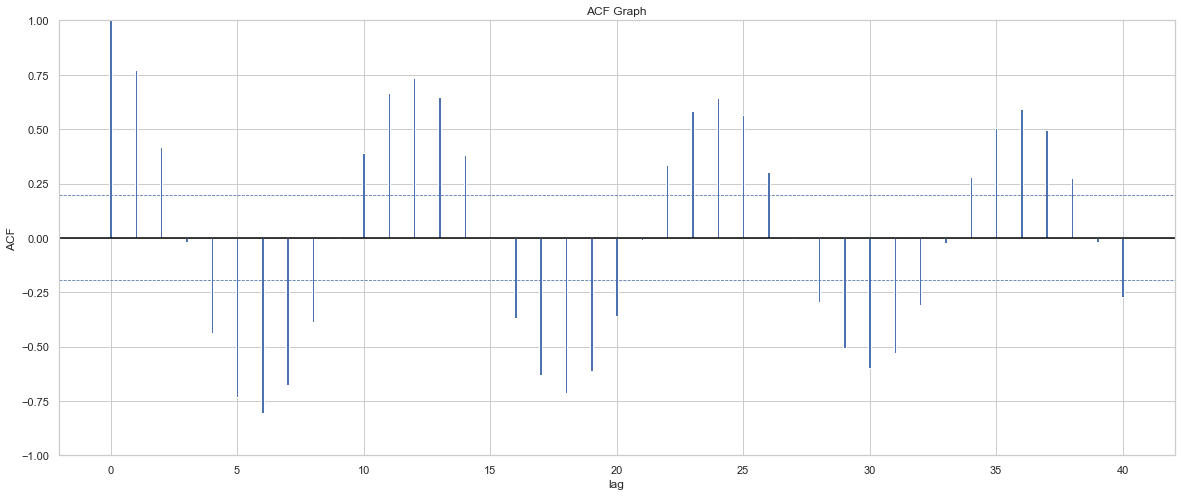

In [95]:
y_len = len(conso_corig['conso_corrige'])

plot_sortie_acf(acf(np.asarray(conso_corig['conso_corrige'])), y_len)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation (𝐼−𝐵) .

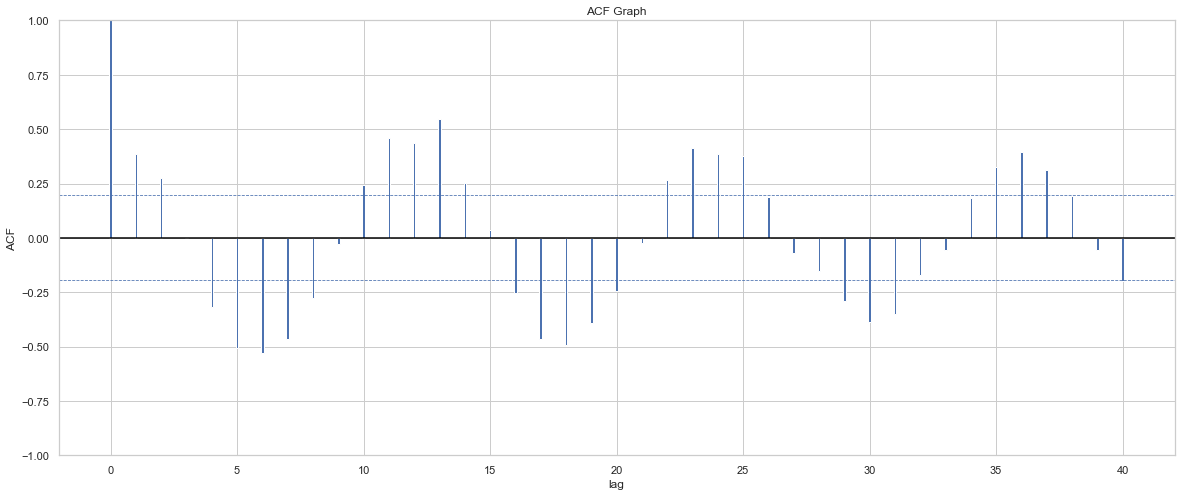

In [96]:
y_dif1 = conso_corig['conso_corrige'] - conso_corig['conso_corrige'].shift(1)

plot_sortie_acf(acf(np.asarray(y_dif1[13:])), y_len)

La sortie ACF de la série ainsi différenciée présente encore une décroissance lente vers 0 pour les multiples de 12. On effectue cette fois la différenciation  (𝐼−𝐵12)  

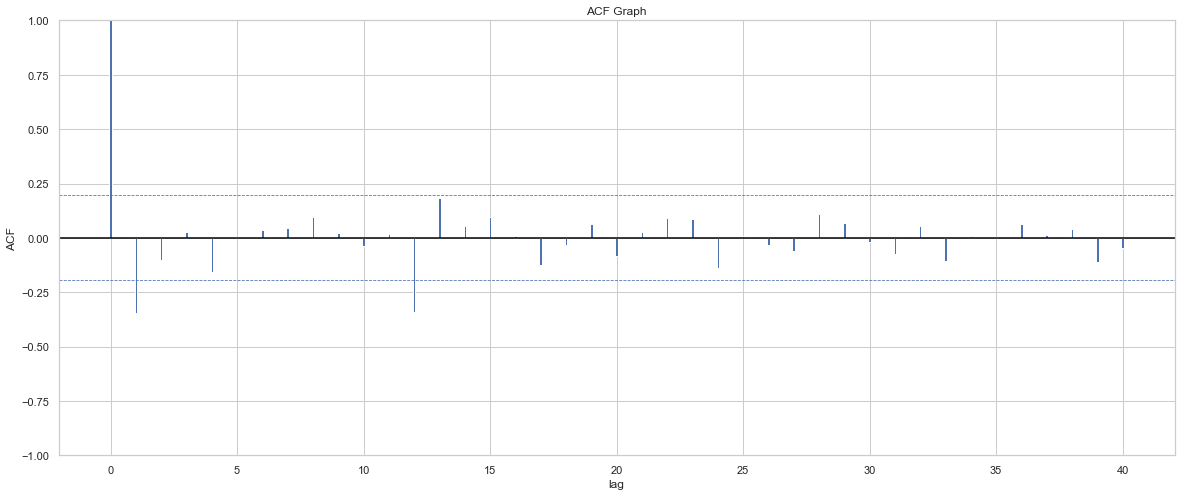

In [97]:
y_dif_1_12 = y_dif1 - y_dif1.shift(12)

plot_sortie_acf(acf(np.asarray(y_dif_1_12[13:])), y_len)

**Identification, estimation et validation de modèles**

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


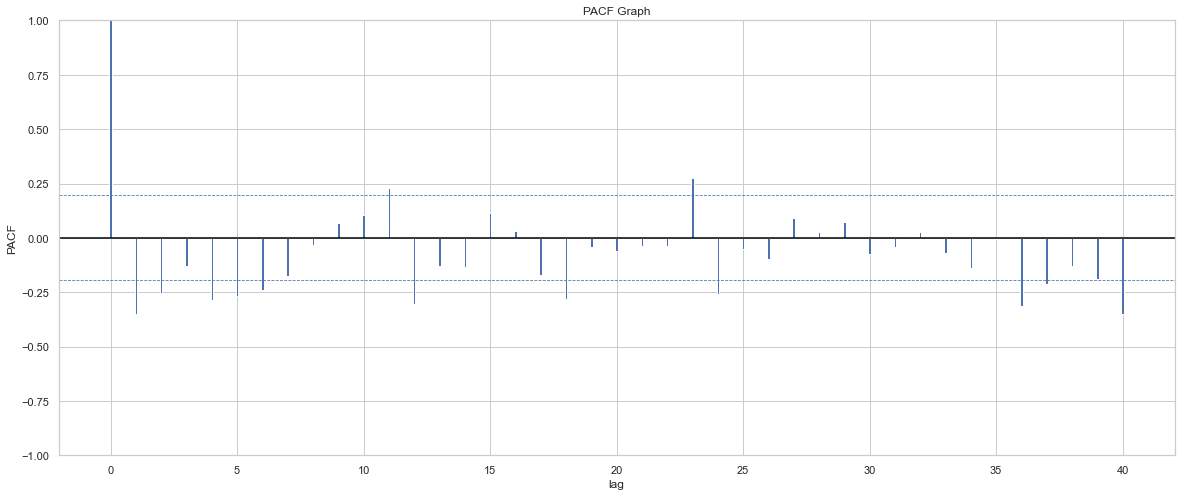

In [98]:
plot_sortie_acf(pacf(np.asarray(y_dif_1_12[13:])), y_len, pacf=True)

<h3> Test d'adfuller pour la détermination de la stationnarité 

In [99]:
adfuller(y_dif1[12:])[1]

8.849258622972777e-11

adfuller : H0 la serie est stationnaire

<h3> Modèle samira

In [100]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(train_conso['conso_corrige']), order=(0,1,1), seasonal_order=(0,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -672.336
Date:                            Mon, 23 Aug 2021   AIC                           1350.671
Time:                                    15:46:15   BIC                           1357.459
Sample:                                         0   HQIC                          1353.370
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1255      0.055     -2.262      0.024      -0.234      -0.017
ma.S.L12      -0.3655      0.057   

**Détermination du meilleur modèle**

In [101]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_conso['conso_corrige'],
                         test='adf',
                          m=12,
                         seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1360.646, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1381.917, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1365.425, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1367.519, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1380.318, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=1360.779, Time=1.42 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1367.609, Time=1.49 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1383.151, Time=0.22 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=1361.064, Time=1.29 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=1365.528, Time=1.66 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1361.591, Time=1.21 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -669.543
Date:                              Mon, 23 Aug 2021   AIC                           1349.086
Time:                                      15:46:54   BIC                           1360.469
Sample:                                           0   HQIC                          1353.618
                                               - 84                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9513      0.012     79.071      0.000       0.928       0.975
ma.L1         -0.8717      0.069    -12.676      0.000      -1.006      -0.737
ma.L2         -0.0183      0.076     -0.241      0.809      -0.167       0.131
ma.S.L12      -0.4237      0.073     -5.820      0.000      -0.566      -0.281
sigma2      6.742e+06   1.86e-09   3.62e+15      0.000    6.74e+06    6.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.70   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.05   Prob(JB):                         0.58
Heteroskedasticity (H):               0.84   Skew:                            -0.28
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+31. Standard errors may be unstable.
"""

Le meilleur modèle de prédiction est le arima 1,0,2 ; 0,1,1 12 

In [102]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(train_conso['conso_corrige']), order=(1,0,2), seasonal_order=(0,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -669.543
Date:                              Mon, 23 Aug 2021   AIC                           1349.086
Time:                                      15:46:55   BIC                           1360.469
Sample:                                           0   HQIC                          1353.618
                                               - 84                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9513      0.012     79.071      0.000       0.928       0.975
ma.L1         -0.87

C:\Users\Lena\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
results1.aic

1349.086150496501

In [104]:
y_hat_avg['sarima'] = results1.forecast(len(test_conso))

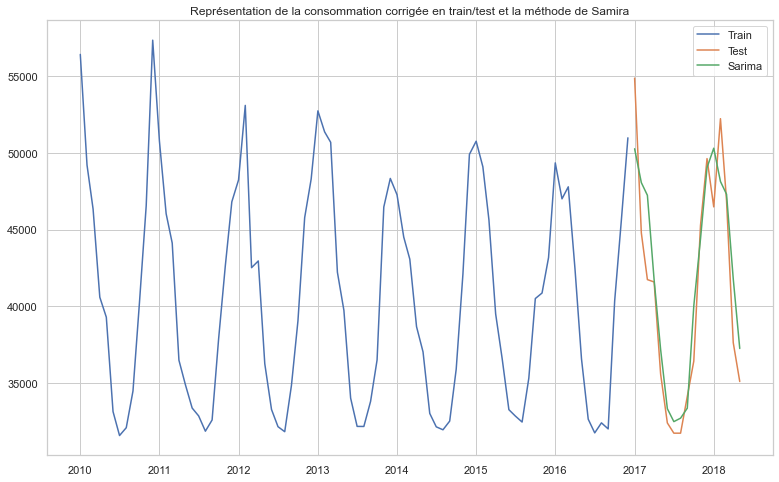

In [105]:
plt.figure(figsize=(13,8))
plt.plot(train_conso, label='Train')
plt.plot(test_conso, label='Test')
plt.plot(y_hat_avg['sarima'], label='Sarima')
plt.title("Représentation de la consommation corrigée en train/test et la méthode de Samira")
plt.legend(loc='best')
plt.show()

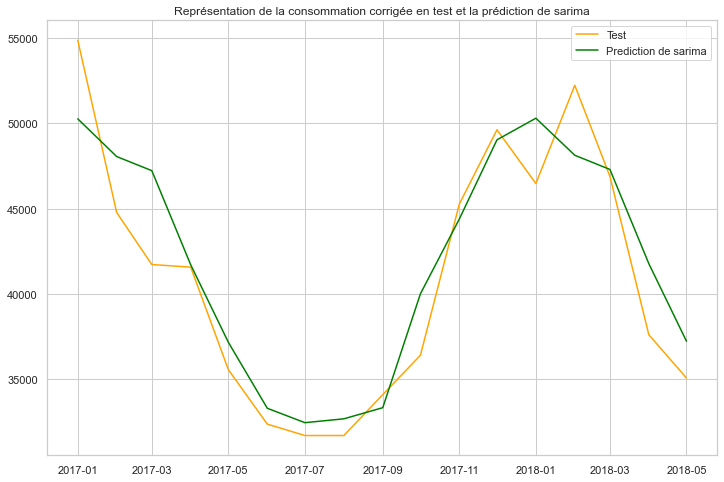

In [106]:
plt.figure(figsize=(12,8))
plt.plot(test_conso, label='Test',color="orange")
plt.title("Représentation de la consommation corrigée en test et la prédiction de sarima")
plt.plot(y_hat_avg['sarima'], label='Prediction de sarima',color="green")
plt.legend(loc='best')
plt.show()

La prédiction correspond au test. 

In [107]:
f_Mean_Absolute_Error = mean_absolute_error(test_conso,y_hat_avg.sarima)
f_Mean_Absolute_Error

2252.2159896759285

In [108]:
f_Mean_Squared_Error = mean_squared_error(test_conso,y_hat_avg.sarima)
f_Mean_Squared_Error

7976462.718903188

In [109]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_conso,y_hat_avg.sarima)

0.05383627800061178

Les scores de la méthode SARIMA sont inférieurs au lissage exponentiel.

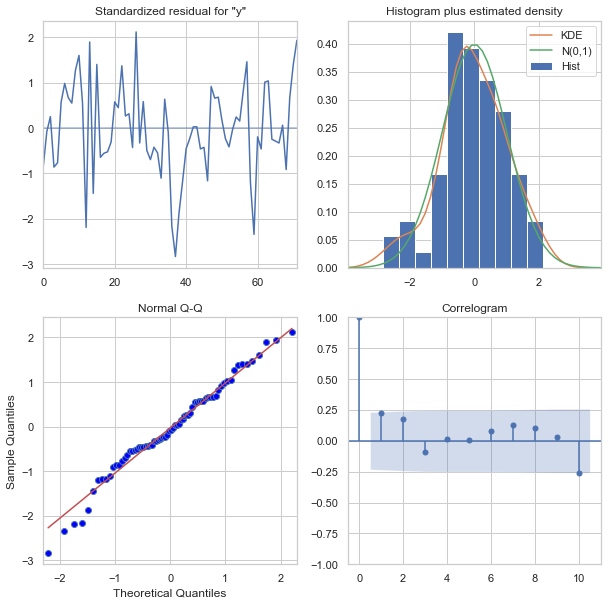

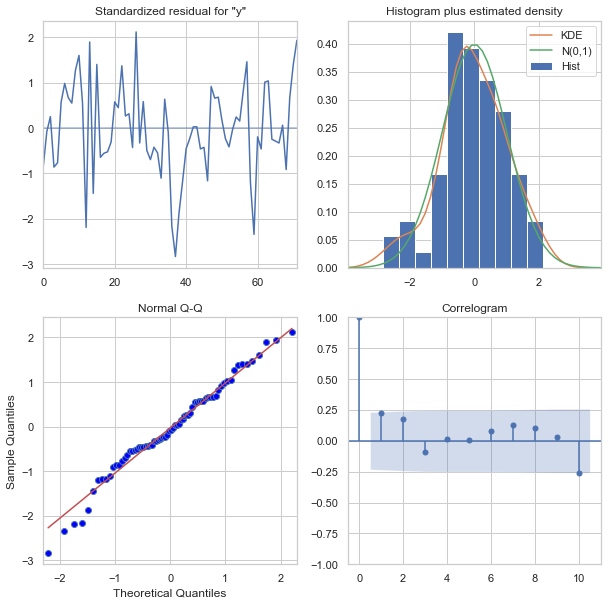

In [110]:
results1.plot_diagnostics(figsize=(10,10))

Les résidus suivent une distribution normales et il n'y a pas d'autocorrélation des résidus. 